DQ_birthdates_basic_stats_v1.1


**Analysis approach of the data quality of dates using basic statistical methods (with Python)**
A user-friendly approach to detect data quality issues and outliers in dates


Search Medium
Write

Marc Alvarez Brotons
Marc Alvarez Brotons
Marc Alvarez Brotons
Dec 31, 2022

·
5 min read
·

Listen







Analysis approach of the data quality of dates using basic statistical methods (with Python)
A user-friendly approach to detect data quality issues and outliers in dates

Photo by Conny Schneider on Unsplash
There main problems that cause defects in data quality are related to: problems in data entry applications, incorrect migration of data from old systems, degradation of information systems, process integration problems, etc.

All of them lead to information degradation problems, generate high management costs at the operational level and have a negative impact on information analysis and decision making.

In order to detect the existence of possible data quality problems in the imported dataset, it is recommended to carry out the following set of steps:

1. Define the use case to analyze
2. Explore dataset
3. Detection and cleansing of main technical errors
4. Analysis of distribution and frequencies


**1. Define the use case to analyze**
It is important to keep in mind the use case to which the data to be analyzed refers, because in its analysis we must apply the technical criteria of the data as well as the functional ones. An example could be the analysis of dates of birth of customers of an online store. The range of ages should be over 18 years to 100 years. Out of this age range, the records have a high probability of being considered a possible error.


**2. Explore dataset**
Once the use case is known, we will import the dates of birth dataset from a public github repository. Once the dataset is loaded, we will obtain the information from the dataset, as well as a preview a sample of the data, where we can see that the dataset contains two columns: one of them is about ids and the other dates of birth on datetime format.

Additionally, we will obtain the maximum and minimum dates to get an idea of ​​the range of dates with which we are working about.

In [ ]:
import pandas as pd

#Import dataset dates from github
url = "https://raw.githubusercontent.com/mabrotons/datasets/master/birthdates.csv"


df = pd.read_csv(url, index_col=0, parse_dates=['birthdates'])

print("Data frame info: ") 
print(df.info())

print("\nData frame head: ") 
print(df.head())

dates = df['birthdates']
print("Min date: " + str(min(dates)))
print("Max date: " + str(max(dates)))

Data frame info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 0 to 2102
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ids         2103 non-null   object        
 1   birthdates  2103 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 49.3+ KB
None

Data frame head: 
           ids birthdates
0  C0000000001 1948-01-16
1  C0000000002 1988-03-11
2  C0000000003 1999-05-11
3  C0000000004 1997-06-01
4  C0000000005 1967-12-10
Min date: 1801-09-03 00:00:00
Max date: 2029-10-15 00:00:00


**3. Detection and cleansing of main technical errors**

As a first step on the analysis, we will build a graph to represent all the data included in the dataset in order to have a first view of the data, its distribution, the range, as well as detect possible outliers.

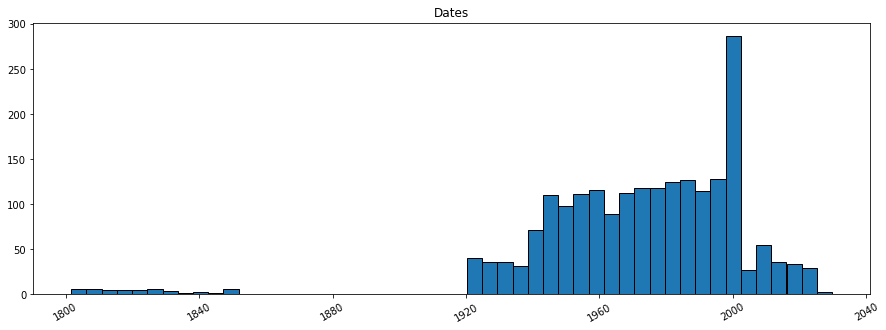

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.hist(dates, bins=50, edgecolor='black')
plt.xticks(rotation=30)
plt.title("Dates")
plt.show()

Once the global vision of the date ranges from year 1801 to 2029 is available, we can see:
- some of years are out of trustly range
- the high density of dates is distributed between the years 1940 to 2000
- the graphs show a clear error close to the year 2000

If we focus on the outliers of the year 2000, we can detect that there is a possible problem with the date 01/01/2000 (dd/mm/YYYY) might be caused by a technical error or by using date file as a dummy date.

If we focus on the outliers of the year 2000, we can detect that there is a possible problem with the date 01/01/2000 (dd/mm/YYYY) that is possibly caused by a technical error or by using date file as a dummy date.

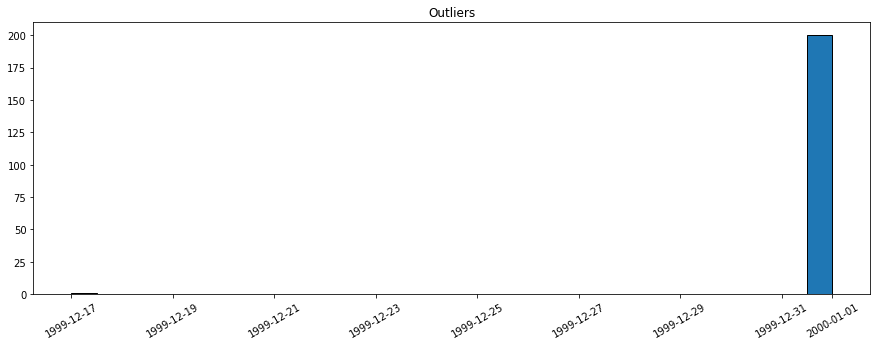

In [ ]:
from datetime import date
dates_outlier = [item for item in dates if item > date(1999, 12, 15) and item < date(2000, 1, 15)]
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.xticks(rotation=30)
plt.hist(dates_outlier, bins=30, edgecolor='black')
plt.title("Outliers")
plt.show()

Once potential outliers are removed, we can re-visualize the plot without erroneous data, making easy.

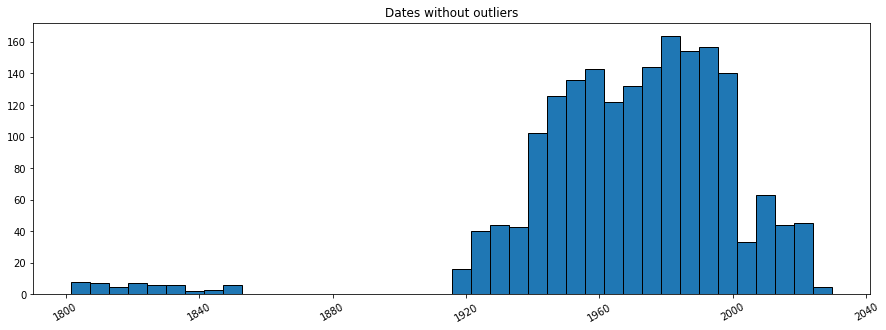

In [ ]:
dates_clean = [item for item in dates if item > date(2000, 1, 1) or item < date(2000, 1, 1)]
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.xticks(rotation=30)
plt.hist(dates_clean, bins=40, edgecolor='black')
plt.title("Dates without outliers")
plt.show()

**4. Analysis of distribution and frequencies**

The next step is to analyze the split of dates of the dataset, component by component. First of all, we can analyze dates (excluding previous detected outliers) from the point of view of the year, and it seems like the global view.

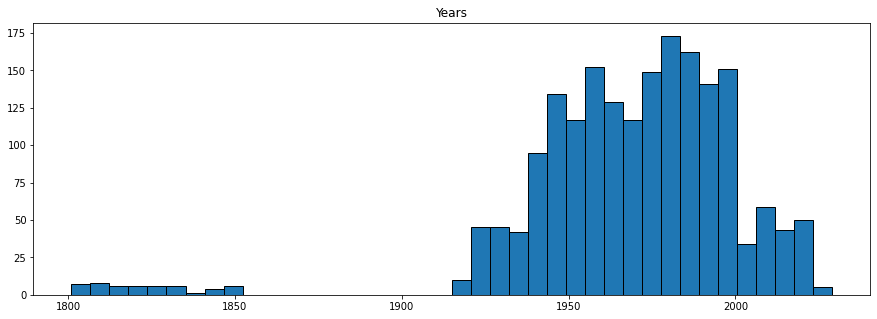

In [ ]:
dates_clean_year = [item.year for item in dates_clean]
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.hist(dates_clean_year, bins=40, edgecolor='black')
plt.title("Years")
plt.show()


Now, we can do the same analysis using the month as frequency.

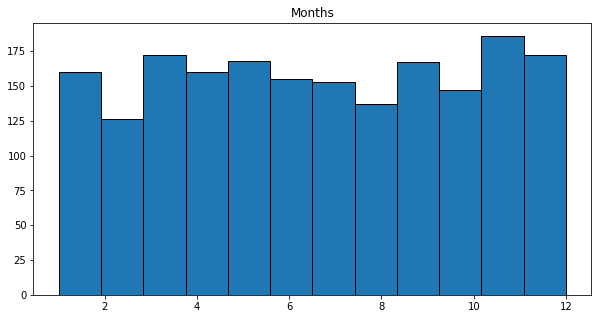

In [ ]:
dates_clean_month = [item.month for item in dates_clean]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.hist(dates_clean_month, bins=12, edgecolor='black')
plt.title("Months")
plt.show()

Viewing dates through the day of the month, we can detect a new outlier candidate: a large number of dates with the first day of the month compared to all other dates.

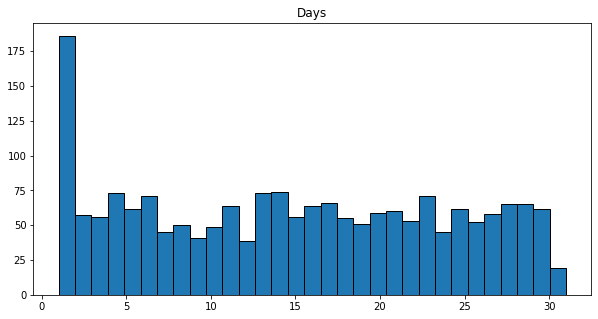

In [ ]:
dates_clean_day = [item.day for item in dates_clean]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.hist(dates_clean_day, bins=31, edgecolor='black')
plt.title("Days")
plt.show()

Finally, we can analyze from days of week as frequency.

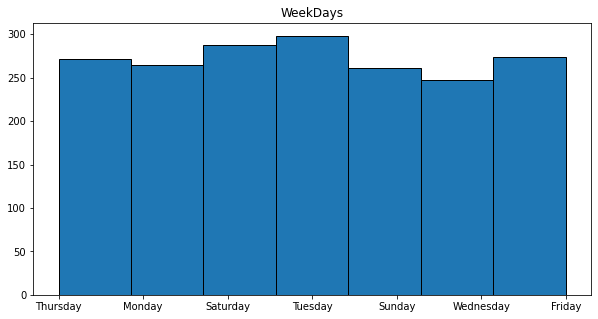

In [ ]:
weekDays = ("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
dates_clean_weekday = [weekDays[item.weekday()] for item in dates_clean]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.hist(dates_clean_weekday, bins=7, edgecolor='black')
plt.title("WeekDays")
plt.show()

In this use case, being a dataset of dates of birth, we can do the analysis as simple dates (as we have done) or transform them to ages.

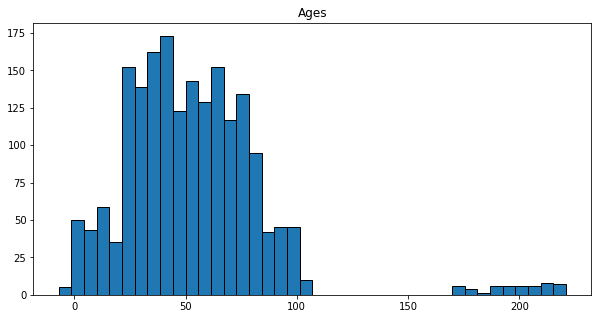

In [ ]:
def calculate_age(birth_date):
    today = date.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
 
    return age
     

ages = [calculate_age(item) for item in dates_clean]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.hist(ages, bins=40, edgecolor='black')
plt.title("Ages")
plt.show()

Now, let’s calculate the basic statistics by age and visualize them easily with a boxplot, including:
- min whisker (Q1–1.5*IQR)
- Q1 (25th percentile rank)
- median
- Q3 (75th percentile rank)
- max whisker (Q3–1.5*IQR)
- outliers at both ends of the box figure

Min ages: -7
Max ages: 221
Mean ages: 53.85601681555439
Median ages: 50
Standard deviation ages: 33.66534871034922



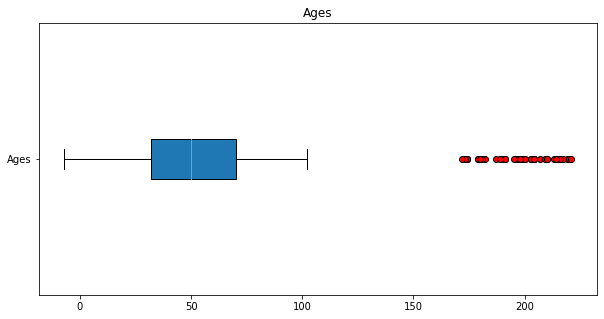

In [ ]:
import statistics
print("Min ages: " + str(min(ages)))
print("Max ages: " + str(max(ages)))
print("Mean ages: " + str(statistics.mean(ages)))
print("Median ages: " + str(statistics.median(ages)))
print("Standard deviation ages: " + str(statistics.stdev(ages)) +"\n")

# Creating plot
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
 
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=ages, vert=False, patch_artist=True, flierprops=red_circle, labels=['Ages']);
plt.title("Ages")
plt.show()

**Conclusion**
We can use basic statistical methods to perform a data quality analysis in order to detect potential errors and outliers. Coding with Python we can easily calculate the statistics and represent them graphically to help their interpretation.

